In [3]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import math
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [4]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.value_counts()

Age  Eduacation  Race      Hisp         MaritalStatus  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
33   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         35
32   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         31
34   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         28
43   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         27
38   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         26
                                                                                                             ..
26   HighSchool  NotBlack  NotHispanic  Married        0      17615.77       22946.56       23614.07          1
                                                              17705.89       20923.50       22196.93          

In [5]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

In [6]:
age = df["Age"]
ageHist = thinkstats2.Hist(age, label = "Labour Training Age")
agePMF= thinkstats2.Pmf(age, label = "Labour Training Age")

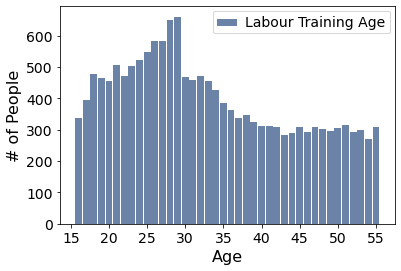

In [7]:
thinkplot.Hist(ageHist)
thinkplot.Config(xlabel='Age', ylabel='# of People')
thinkplot.bigger_text()

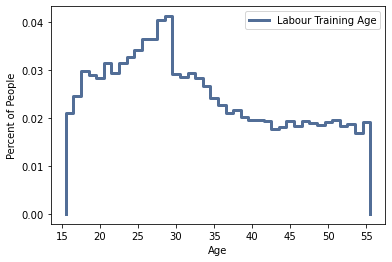

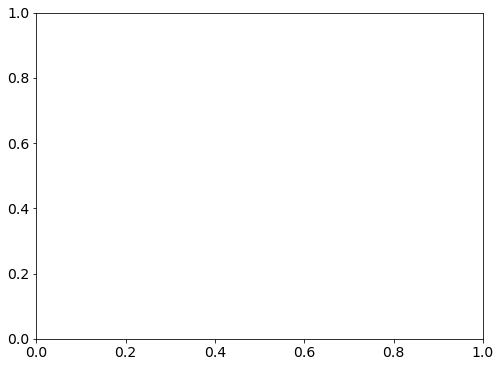

In [8]:
thinkplot.Pmfs([agePMF])
thinkplot.Show(xlabel="Age", ylabel = "Percent of People")
thinkplot.bigger_text()

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [9]:
ofAge = age[age == 51]
overAge = age[age > 51]
fiftyOne = round((ofAge.size/age.size),4)
overFiftyOne = round((overAge.size/age.size),4)

print("Fraction of the People who are exactly 51: " + str(ofAge.size) + "/" + str(age.size) + ", or " + str(fiftyOne) + ".")
print("Fraction of the People who are over 51: " + str(overAge.size) + "/" + str(age.size) + ", or " + str(overFiftyOne) + ".")

Fraction of the People who are exactly 51: 314/15992, or 0.0196.
Fraction of the People who are over 51: 1171/15992, or 0.0732.


##### What is the median age?

In [10]:
medianAge = age.median()

print("The median age for this data set is:", medianAge)

The median age for this data set is: 31.0


##### Does the distribution of the sample data seem to mirror the working age population?

Mostly it does, seeing the minimum age of 16 and the average age of 31. But, the maximum age of 55 falls a bit short of the accepted retirement age of 65, meaning there is probably 10 years worth of people that we are missing.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

##### Education

In [11]:
edu = df["Eduacation"]
print(edu.value_counts(),"\n")
print(edu.describe())
print("% Pop Who Didn't Graduate:", edu.value_counts()[1]/edu.count()*100)

HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Eduacation, dtype: int64 

count          15992
unique             5
top       HighSchool
freq            6252
Name: Eduacation, dtype: object
% Pop Who Didn't Graduate: 29.58354177088544


##### Race

In [12]:
race = df["Race"]
print(race.value_counts(),"\n")
print(race.describe())
print("% Pop Black:", race.value_counts()[1]/race.count()*100)

NotBlack    14816
black        1176
Name: Race, dtype: int64 

count        15992
unique           2
top       NotBlack
freq         14816
Name: Race, dtype: object
% Pop Black: 7.35367683841921


##### Hispanic Heritage

In [13]:
hisp = df["Hisp"]
print(hisp.value_counts(),"\n")
print(hisp.describe())
print("% Pop Hispanic:", hisp.value_counts()[1]/hisp.count()*100)

NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64 

count           15992
unique              2
top       NotHispanic
freq            14840
Name: Hisp, dtype: object
% Pop Hispanic: 7.20360180090045


##### Marital Status

In [14]:
married = df["MaritalStatus"]
print(married.value_counts(),"\n")
print(married.describe())
print("% Pop Married:", married.value_counts()[0]/married.count()*100)

Married       11382
NotMarried     4610
Name: MaritalStatus, dtype: int64 

count       15992
unique          2
top       Married
freq        11382
Name: MaritalStatus, dtype: object
% Pop Married: 71.17308654327164


##### Nodeg

In [15]:
nodegree = df["Nodeg"]
print(nodegree.value_counts(),"\n")
print(nodegree.describe())
print("% Pop With No Degree:", nodegree.value_counts()[1]/nodegree.count()*100)

0    11261
1     4731
Name: Nodeg, dtype: int64 

count    15992.000000
mean         0.295835
std          0.456432
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Nodeg, dtype: float64
% Pop With No Degree: 29.58354177088544


##### Demographic Conclusion


The percentages of the population that Black and Hispanic poeple make up, as well as the percentages of people with no degrees and who are married do seem to be close approximations of the the whole US population (at least according to Wikipedia).

### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

### Part 3.1

##### Plot Earnings Data

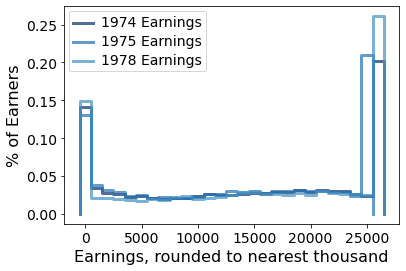

In [27]:

earn1974 = df["Earnings_1974"]
earn1974 = earn1974[~np.isnan(earn1974)]
earn1974 = round(earn1974,-3)
pmf1974 = thinkstats2.Pmf(earn1974, label = "1974 Earnings")
thinkplot.Pmf(pmf1974)

earn1975 = df["Earnings_1975"]
earn1975 = earn1975[~np.isnan(earn1975)]
earn1975 = round(earn1975,-3)
pmf1975 = thinkstats2.Pmf(earn1975, label = "1975 Earnings")
thinkplot.Pmf(pmf1975)

earn1978 = df["Earnings_1978"]
earn1978 = earn1978[~np.isnan(earn1978)]
earn1978 = round(earn1978,-3)
pmf1978 = thinkstats2.Pmf(earn1978, label = "1978 Earnings")
thinkplot.Pmf(pmf1978)

thinkplot.Config(xlabel = "Earnings, rounded to nearest thousand", ylabel = "% of Earners")
thinkplot.bigger_text()

As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### Conclusion Drawn

The number of earners in the middle seems to have decreased when we go from 1975 to 1978, while the earners at the ends of the graph has increased in the same time. Meaning more people are poorer than the middle values, and more people are richer than the middle values. The middle earnings got squeezed out to the sides.

### Part 3.2

##### What to Investigate Further


In [17]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

##### Black

In [18]:
blackEarn = df[["Race","Earnings_1978"]]
blackEarn = blackEarn[blackEarn.Race == "black"]
blackEarn = blackEarn["Earnings_1978"]
blackEarn = round(blackEarn,-3)
nonBlackEarn = df[["Race","Earnings_1978"]]
nonBlackEarn = nonBlackEarn[nonBlackEarn.Race == "NotBlack"]
nonBlackEarn = nonBlackEarn["Earnings_1978"]
nonBlackEarn = round(nonBlackEarn,-3)

print(abs(CohenEffectSize(blackEarn,nonBlackEarn)))

0.3209490408620296


##### Hispanic

In [19]:
hispEarn = df[["Hisp","Earnings_1978"]]
hispEarn = hispEarn[hispEarn.Hisp == "hispanic"]
hispEarn = hispEarn["Earnings_1978"]
hispEarn = round(hispEarn,-3)
nonHispEarn = df[["Hisp","Earnings_1978"]]
nonHispEarn = nonHispEarn[nonHispEarn.Hisp == "NotHispanic"]
nonHispEarn = nonHispEarn["Earnings_1978"]
nonHispEarn = round(nonHispEarn,-3)

print(abs(CohenEffectSize(hispEarn,nonHispEarn)))



0.16269710757295444


##### Marital Status

In [20]:
marryEarn = df[["MaritalStatus","Earnings_1978"]]
marryEarn = marryEarn[marryEarn.MaritalStatus == "Married"]
marryEarn = marryEarn["Earnings_1978"]
marryEarn = round(marryEarn,-3)
nonMarryEarn = df[["MaritalStatus","Earnings_1978"]]
nonMarryEarn = nonMarryEarn[nonMarryEarn.MaritalStatus == "NotMarried"]
nonMarryEarn = nonMarryEarn["Earnings_1978"]
nonMarryEarn = round(nonMarryEarn,-3)

print(abs(CohenEffectSize(marryEarn,nonMarryEarn)))

#histMarry = thinkstats2.Hist(marryEarn, label = "Married Earnings")
#histNonMarry = thinkstats2.Hist(nonMarryEarn, label = "Non Married Earnings")
#thinkplot.PrePlot(cols=2)
#thinkplot.Hist(histMarry)
#thinkplot.Hist(histNonMarry)
#thinkplot.Config(xlabel = "Earnings, rounded to nearest thousand", ylabel = "# of Earners")
#thinkplot.bigger_text()

0.5758092514776242


##### No Degree

In [21]:
noDegreeEarn = df[["Nodeg","Earnings_1978"]]
noDegreeEarn = noDegreeEarn[noDegreeEarn.Nodeg == 1]
noDegreeEarn = noDegreeEarn["Earnings_1978"]
noDegreeEarn = round(noDegreeEarn,-3)
degreeEarn = df[["Nodeg","Earnings_1978"]]
degreeEarn = degreeEarn[degreeEarn.Nodeg == 0]
degreeEarn = degreeEarn["Earnings_1978"]
degreeEarn = round(degreeEarn,-3)

print(abs(CohenEffectSize(noDegreeEarn,degreeEarn)))

#histNoDeg = thinkstats2.Hist(noDegreeEarn, label = "Non Degree Earnings")
#histDegree = thinkstats2.Hist(degreeEarn, label = "Degree Earnings")
#thinkplot.PrePlot(cols=2)
#thinkplot.Hist(histNoDeg)
#thinkplot.Hist(histDegree)
#thinkplot.Config(xlabel = "Earnings, rounded to nearest thousand", ylabel = "# of Earners")
#thinkplot.bigger_text()

0.33950112617681033


Your marital status seems to have the greatest effect on your earnings. To investigate further, you could look at the tax laws around this time, to see if they incentivise marriage. Or you could look at the particular type of degree, rather than just any degree, and see how that correlates to earnings, and whether or not those who have higher degrees are married or not.

#### Part 3.3

##### Histogram and PMF

In [22]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

##### Histogram

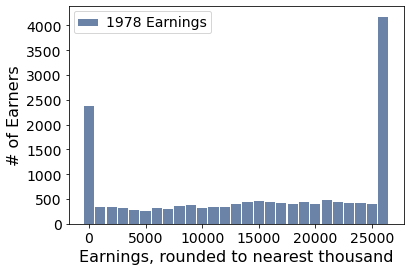

In [23]:
earn1978 = df["Earnings_1978"]
earn1978 = earn1978[~np.isnan(earn1978)]
earn1978 = round(earn1978,-3)
hist1978 = thinkstats2.Hist(earn1978, label = "1978 Earnings")
thinkplot.Hist(hist1978)
thinkplot.Config(xlabel = "Earnings, rounded to nearest thousand", ylabel = "# of Earners")
thinkplot.bigger_text()

##### PMF

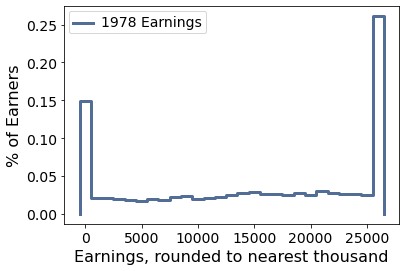

In [24]:
earn1978 = df["Earnings_1978"]
earn1978 = earn1978[~np.isnan(earn1978)]
earn1978 = round(earn1978,-3)
pmf1978 = thinkstats2.Pmf(earn1978, label = "1978 Earnings")
thinkplot.Pmf(pmf1978)
thinkplot.Config(xlabel = "Earnings, rounded to nearest thousand", ylabel = "% of Earners")
thinkplot.bigger_text()

##### Statistics

In [25]:
print("The Mean is:", str(earn1978.mean()))
print("The Median is:", str(earn1978.median()))
print(earn1978.describe())


The Mean is: 14957.478739369684
The Median is: 16000.0
count    15992.000000
mean     14957.478739
std       9777.005530
min          0.000000
25%       6000.000000
50%      16000.000000
75%      26000.000000
max      26000.000000
Name: Earnings_1978, dtype: float64


##### Differences in Median Income, and Theory on Why


##### Outliers

In [26]:
counts = earn1978.value_counts()

print("% of Earners at the Max Value:", counts[26000]/earn1978.count()*100)
print("% of Earners at the Lowest Value:", counts[0]/earn1978.count()*100)

% of Earners at the Max Value: 26.10680340170085
% of Earners at the Lowest Value: 14.907453726863432


##### Outlier Conclusions


The outliers are the massive amounts of earners who earn $0, and the massive amounts of earners who earn $26000. This will change the average earnings. The presence of the highest amounts being exactly $26000 tells me that there is some cutoff point in the data, and either this is a subset of more data, or the data collection was faulty in some manner. As well, the amount of people at $0 will affect discussion of average incomes of employed people, as earning $0 probably means you are unemployed. 